In [1]:
# -*- coding: utf-8 -*-
from __future__ import print_function

# Introduksjon til lineær regresjon

I denne notebooken skal vi se på en form for maskinlæring som er kjent som *lineær regresjon*. Lineær regresjon brukes når man ønsker å trene maskinen til å finne et tall som er avhengig av et annet tall. F.eks. boligpris i forhold til kvadratmeter, karakter i forhold til tid brukt på lekser osv. Grunnen til at vi kaller det *lineær* regresjon er at vi antar at forholdet mellom tallene er *lineært*, det betyr at det kan beskrives av en rett linje

## Gresshoppesang og varmt vær
Anta at du bor et sted der det er mye gresshopper og du kan ofte høre gresshoppene. En dag innser du at det virker som det er mer gresshoppesang når det er varmt og mindre gresshoppesang når det er kaldere. Du kommer på at du kanskje kan bruke det forholdet til å finne ut hva temperaturen er basert på hvor mye gresshoppesang du hører.

Det første du må gjøre er å samle data. Du må altså måle temperaturen og hvor mye gresshoppesang du hører for hver temperatur du måler. 
Vi har heldigvis et ferdig datasett med nettopp slike målinger. (Dataen er hentet fra <a href="http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html"> denne samlingen</a>) Dataen er lagret i en csv fil som er en slags tabell som vi kan lese inn ved å sende filnavnet til  `read_csv('filepath')`. 

In [2]:
# Importere read_csv fra pandas pakken
from pandas import read_csv 

# Lese inn tabellen fra filnavn med read_csv
data = read_csv('../../datasets/small_examples/CricketChirps.csv') 

Nå har vi lest inn tabellen med data og lagret det i en variabel som vi kaller `data`. Hvis vi vil se på dataen kan vi hente ut de første fem radene i tabellen med `data.head()`

In [3]:
data.head()

,chirps,temperature
0,20.000000,31.444444
1,16.000000,21.999999
2,19.799999,34.055557
3,18.400000,29.055557
4,17.100000,26.999999


"Chirps" vil si hvor mange gresshoppe-"chirps" vi hører per sekund og temperaturen er gitt i grader celcius. Vi kan hente ut spesifikke kolonner ved å sende inn en liste med navn på de kolonnene vi ønsker.
Så hvis vi bare vil ha temperaturkolonnen kan vi hente den ut slik:

In [4]:
data[['temperature']]

,temperature
0,31.444444
1,21.999999
2,34.055557
3,29.055557
4,26.999999
5,23.999998
6,20.944443
7,27.777778
8,20.777779
9,28.500002


Nå kan vi vise fram dataene i et *scatterplott*

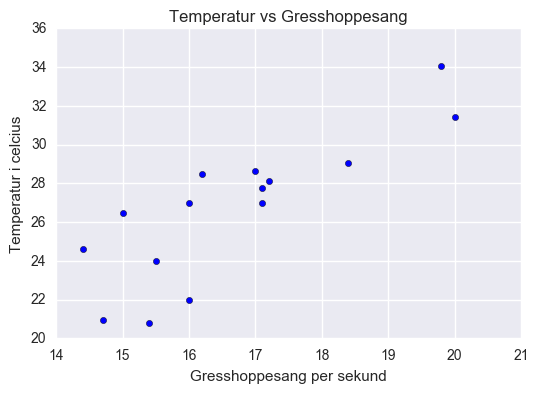

In [5]:
import matplotlib.pyplot as plt # importere pakke for plotting
import seaborn # pakke som gjør plottene penere :)
# denne linja sikrer at plottene kommer under cellen:
%matplotlib inline 

plt.figure() # Lage ny figur
plt.scatter(data[['chirps']],data[['temperature']]) # tegne opp scatterplot med temperatur vs gresshoppesang
plt.xlabel('Gresshoppesang per sekund') # lable aksene
plt.ylabel('Temperatur i celcius')
plt.title('Temperatur vs Gresshoppesang') # Tittel på plottet
plt.show() # vise frem figuren

Ut i fra plottet ser det ut som det faktisk kan være en sammenheng mellom gresshoppesang og temperatur. 


**Oppgave 1:**
Hvis du for eksempel hører 19 gresshoppe "chirps" i sekundet, hvor mange grader vil du gjette at det er ute? **Skriv inn svaret i cellen under:**

In [6]:
# Ditt svar her:

Men vi vil helst ikke gjette, vi ønsker at datamaskinen vår skal lære seg forholdet mellom gresshoppesang og temperatur. Nærmere bestemt ønsker vi å finne en funksjon som tar inn hvor mye gresshoppesang vi hører og spytter ut hva temperaturen er. Hvis vi ser på figuren vi plottet kan vi kanskje se at punktene nesten ligger på en linje. **Det vi trenger er å finne den linja som passer best med punktene.** La oss først prøve en tilfeldig linje:

In [20]:
# Hjelpefunksjoner 
# Her er noe kode vi har laget for visualisering. 
# Det er ikke nødvendig å forstå detaljene i denne koden :)

class Line():
    def __init__(self,a=0.1,b=28):
        self.a = a
        self.b = b
        
    def __call__(self,x):
        return self.a*x.ravel() + self.b

def plot_error_lines(X,Y,f,xmin=0,xmax=40):
    for x,y in zip(X,Y):
        x = x[...,np.newaxis]
        y = y[...,np.newaxis]
        y_ = f(np.reshape(x,(-1,1)))
        plt.plot(np.array([x,x]),np.array([y,y_]),'r-')

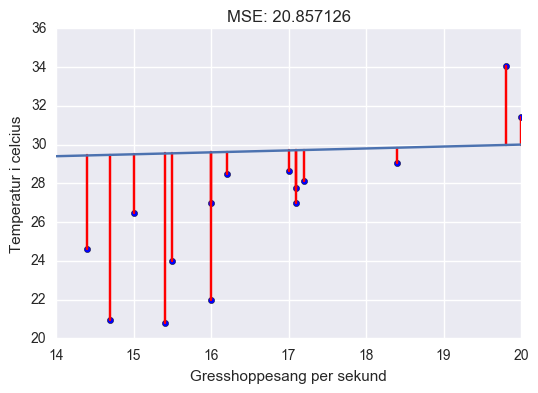

In [45]:
# import numpy pakken for å bruke linspace
import numpy as np

# Lage et object for å tegne linjer
line = Line(a=0.1,b=28)

# Regne ut en linje for plotting
x = np.linspace(0,40,501) 
y = line(x[:,np.newaxis]) 

# Lage ny figur
plt.figure()

# Tegne opp røde feillinjer med hjelpefunksjonen plot_error_lines
# Den tar inn data og en funksjon som skal prøve å passe med dataen
plot_error_lines(data['chirps'],data['temperature'],line)

# Scatterplot med chirps på en akse og temperature på den andre aksen
plt.scatter(data[['chirps']],data[['temperature']]) 

# Tegne opp linja
plt.plot(x,y)


plt.xlabel('Gresshoppesang per sekund') # lable x aksen
plt.ylabel('Temperatur i celcius') # lable y aksen

# Regne ut feilen og bruk det som tittel på plottet
plt.title("MSE: %f" % np.mean((line(np.reshape(data['chirps'],
                                               (-1,1))).ravel() - data['temperature']) ** 2))

plt.axis([14,20,20,36]) # bestemme verdiene på aksene
plt.show() # hvis frem plottet

Denne linja ser kanskje ikke ut som den passer noe særlig godt. 

De røde strekene som er tegnet opp viser avstanden fra hvert punkt til linja. Dette gir oss et mål på hvor bra linja passer: Hvis gjennomsnittet av feilen for alle punktene er liten, så passer linja bra. **Vi ønsker altså å finne den linja som gir minst gjennomsnitlig feil for alle punktene.** I praksis ser vi egentlig på *kvadratet av avstanden*, så vi er sikre på at det alltid blir positivt, men prinsippet blir det samme. Vi kaller denne feilen for *MSE* (Mean Square Error)

Under har vi laget et interaktivt plot med sliders for å justere linjas *stigningstall* og *skjæringspunkt*. Hvis sliderene er litt trege, kan du også trykke på talverdien ved siden av og bare skrive inn nye verdier. Stigningstallet forteller hvor "bratt" linja er og skjæringspunktet forteller hvor linja skjærer y aksen

(Vi zoomer også litt ut for å gjøre det lettere og se hvordan linja flytter seg, men dataen er den samme)

<IPython.core.display.Javascript object>


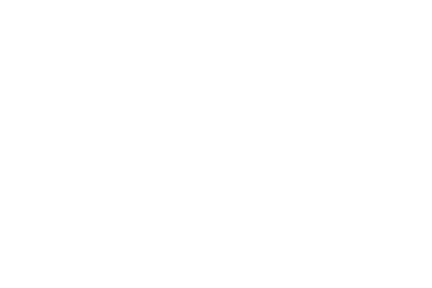

<IPython.core.display.Javascript object>


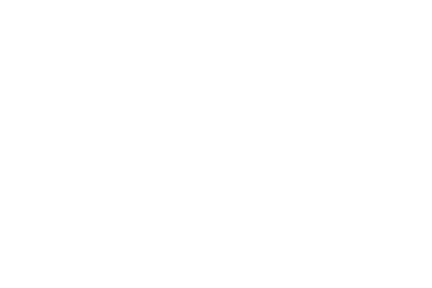

In [56]:
# Dette er kode for å lage et interaktivt plot i en notebook som er godt utenfor
# pensum for dette kurset. Bare kjør cellen og test forskjellige verdier.
%matplotlib notebook

line = Line(a=0.1,b=28)

xmin,xmax = 0,40
ymin,ymax = 0,60

fig = plt.figure()

plot_error_lines(data['chirps'],data['temperature'],line)
plt.scatter(data['chirps'],data['temperature'])

plt.xlabel('Gresshoppesang per sekund') # lable x aksen
plt.ylabel('Temperatur i celcius') # lable y aksen

plt.show()

import ipywidgets as widgets
from IPython.display import display

b_text  = widgets.FloatText(value=28)
b_slide = widgets.FloatSlider(value=28,description='Skjaeringspunkt')
a_text  = widgets.FloatText(value=0.1)
a_slide = widgets.FloatSlider(value=0.1,description='Stigningstall', min=0, max=3.0, step=0.1)

display(widgets.HBox([a_slide,b_slide]))

mylink  = widgets.jslink((b_text, 'value'), (b_slide, 'value'))
mylink2 = widgets.jslink((a_text, 'value'), (a_slide, 'value'))

def on_slider_change(c):
    fig.clear()
    
    line.a = a_slide.value
    line.b = b_slide.value
    plot_error_lines(data['chirps'],data['temperature'],line)
    
    # Regne ut en linje for plotting
    x = np.linspace(0,40,501) 
    y = line(x[:,np.newaxis]) 
    plt.plot(x,y)
    
    plt.scatter(data['chirps'],data['temperature'])
    
    plt.title("MSE: %f" % np.mean((line(np.reshape(data['chirps'],
                                               (-1,1))).ravel() - data['temperature']) ** 2))

    plt.xlabel('Gresshoppesang per sekund') # lable x aksen
    plt.ylabel('Temperatur i celcius') # lable y aksen
    
    plt.axis([0,40,0,60])
    fig.canvas.draw()
    
b_slide.observe(on_slider_change)
a_slide.observe(on_slider_change)

**Oppgave 2:** Hva er den minste feilen du kan få? Skriv ned stigningstall og skjæringspunkt som gir minst feil sammen med den minste feilen i cellen under:

In [54]:
# Ditt svar her:
stigningstall = 0 #?
skjaeringspunkt = 0 #?
minste_feil = 0 #?

Men istedet for å prøve oss frem på den måten kan vi få datamaskinen til å gjøre det for oss. Datamaskinen kan mye raskere prøve seg frem til den finner den beste linja. Sklearn pakken har en ferdig funksjon, `LinearRegression` som gjør nettopp dette. Vi kan importere den slik:

In [41]:
from sklearn.linear_model import LinearRegression

Vi bruker pakken ved å først lage en regressor ved å kalle på `LinearRegression()`. Vi lagrer den i en variabel som vi kaller `reg`. Vi kan egentlig kalle den hva vi vil, men det er lurt å velge et navn som er forståelig så andre kan forstå koden din senere. Så kan vi finne den linja som passer best ved å kjøre `reg.fit(x,y)`

In [42]:
reg = LinearRegression() # opprette en modell for lineær regresjon
reg.fit(data[['chirps']],data[['temperature']]) # trene modellen på vår data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Etter å ha kjørt `.fit()` har vi funnet linja. Vi sier at vi har *trent modellen*. Nå kan vi bruke den ferdigtrente modellen til å gjette hvor varmt det er når vi hører 19 chirps i sekundet. For å gjøre det kaller vi på `.predict()`

In [43]:
print(reg.predict(19))

[[ 30.97950099]]


**Oppgave 3:** scroll opp og se hva svaret ditt på *oppgave 1* var. Stemmer det med svaret over? Hvor stor er forskjellen?

*Ditt svar her:*


Vi kan også plotte linja som en funksjon sammen med punktene. Vi har laget en egen hjelpepakke som heter useful_tools. I den finnes det funksjoner for å teste en modell. For dette eksemplet lager vi en `ModelTester` og bruker testfunksjonen `test_regressor` for å få ut hva feilen (MSE) blir for modellen vi har trent.

('MSE: ', 3.920728177409853)


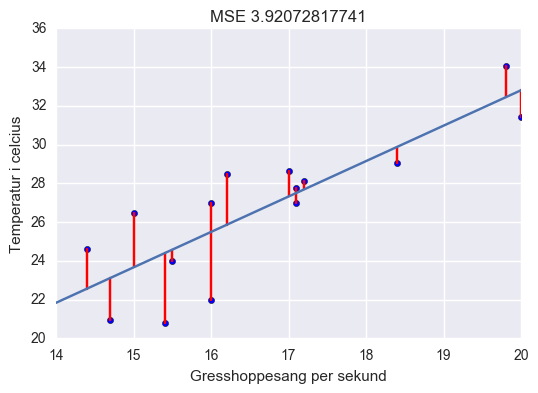

In [59]:
%matplotlib inline
# importere hjelpefunksjon for testing.
import sys
import os
sys.path.append(os.path.split(os.path.abspath(os.getcwd()))[0])
from useful_tools import ModelTester

plt.figure() # lage ny figur

# tegn røde feillinjer
plot_error_lines(data['chirps'],data['temperature'],reg.predict)

# bruke reg.predict til å tegne opp linja
x = np.linspace(0,40,501) 
y = reg.predict(x[:,np.newaxis]) 
plt.plot(x,y)

# plotte datapunktene
plt.scatter(data[['chirps']],data[['temperature']])

plt.xlabel('Gresshoppesang per sekund') # lable x aksen
plt.ylabel('Temperatur i celcius') # lable y aksen

tester = ModelTester(data[['chirps']],data[['temperature']])
plt.title("MSE %s" %tester.test_regressor(reg))

plt.axis([14,20,20,36]) 
plt.show()

**Oppgave 4:** Hvordan er feilen i forhold til den du fant over?

Så nå har vi klart å finne linja som passer best med punktene og har minst feil. **Men det kan være skummelt å bruke feilen på treningsdata som et mål på hvor bra modellen er **

Som et eksempel på det kan vi prøve å tilpasse et høyere grads polynom i stedet. Detaljene er utenfor dette kursets pensum, så du trenger ikke forstå koden i cellen under.

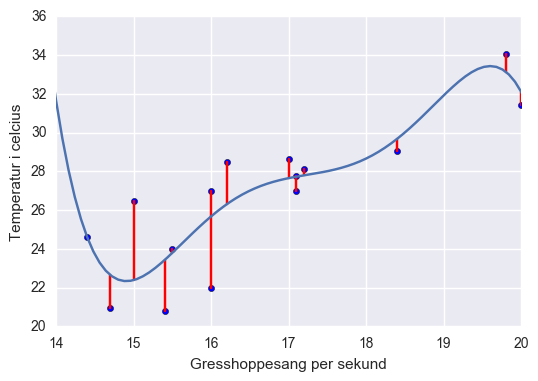

In [62]:
# importere funksjon for å lage polynom fra sklearn
from sklearn.preprocessing import PolynomialFeatures

# transformere egenskapene til flere dimensjoner 
# for å tilpasse et polynom
poly = PolynomialFeatures(degree=5)
c_p =  poly.fit_transform(data[['chirps']])

# lage regressor og tren på polynomegenskapene
reg_p = LinearRegression()
reg_p.fit(c_p,data[['temperature']])

# liten funksjon for å regne ut polynom for plotting
def polyreg(x):
    return reg_p.predict(poly.fit_transform(x))

# lage en ny figur
plt.figure()

# plotte feillinjer
plot_error_lines(data['chirps'],data['temperature'],polyreg)

# tegne datapunktene
plt.scatter(data['chirps'],data['temperature']) 

# tegne polynomet
x = np.linspace(0,40,501) 
y = polyreg(x[:,np.newaxis]) 
plt.plot(x,y)

plt.xlabel('Gresshoppesang per sekund') # lable x aksen
plt.ylabel('Temperatur i celcius') # lable y aksen


plt.axis([14,20,20,36])
plt.show()

Som dere ser er feilen blitt veldig lav. Og det er jo bra, men tror dere denne modellen gir god innsikt i forholdet mellom gresshoppesang og temperatur? Det virker kanskje litt usannsynlig at det plutselig, for mindre enn 15 "chirps" per sekund, er veldig varmt? Så selv om feilen har blitt midre, har vi ikke nødvendigvis en bedre modell.

**Vi trenger altså et bedre mål på hvor god en modell er.**

## Treningsdata og testdata

Vi kan dessverre ikke vite hvordan en modell vil gjøre det på ny og ukjent data. Ukjent data er jo nettopp, ukjent. Det vi kan gjøre i stedet er å splitte den dataen vi har i to. En bit bruker vi til trening av modellen og en bit gjemmer vi bort og holder "ukjent" til etter vi har trent ferdig. Så kan vi bruke denne biten til å måle feilen vi får.  Vi kaller bitene for *treningsdata* og *testdata*. Det er veldig viktig at vi plukker tilfeldig når vi deler opp i treningsdata og testdata. Hvis det ikke er tilfeldig kan det hende vi lærer maskinen et mønster som vi ikke vil at den skal lære.

Sklearn har heldigvis en innebygd funksjon, `train_test_split`  for å dele inn i trenings og testdata!

Vi kan importere og bruke den slik:

In [63]:
# importere funksjonen train_test_split fra sklearn.model_selection
from sklearn.model_selection import train_test_split

# bruke train_test_split til å dele inn data i treningsdata og testdata
train_data, test_data, train_target, test_target = train_test_split(data[['chirps']],data[['temperature']], test_size=0.33,random_state=11)

`train_test_split` tar inn `x`- og `y`data og `test_size`. `test_size` sier hvor stor prosent av dataen som skal plukkes ut som testdata. Det er vanlig å bruke ca. 33% 

Vi kan vise frem treningsdataen in et nytt scatterplott:

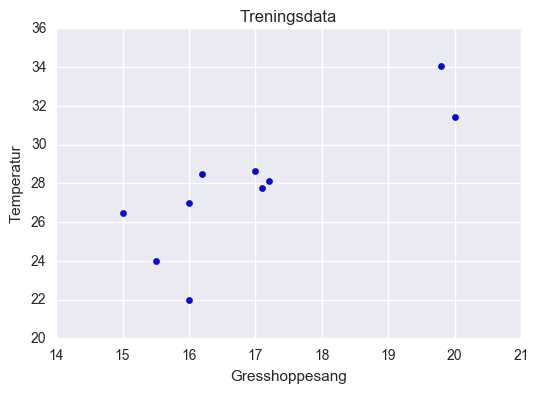

In [64]:
plt.figure() # lage en figur
plt.scatter(train_data,train_target) # tegne opp et scatterplot
plt.title("Treningsdata") # lage tittel på figuren


plt.xlabel('Gresshoppesang per sekund') # lable x aksen
plt.ylabel('Temperatur i celcius') # lable y aksen
plt.show()

Nå kan vi lage en ny modell med `LinearRegression` og trene den på treningsdataen

In [70]:
reg2 = LinearRegression()
reg2.fit(test_data,test_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Tilslutt kan vi vise frem testdataen som rosa kryss og finne den totale feilen på både trening og testdata

Treningsfeil: 5.823015
Testfeil: 3.541790


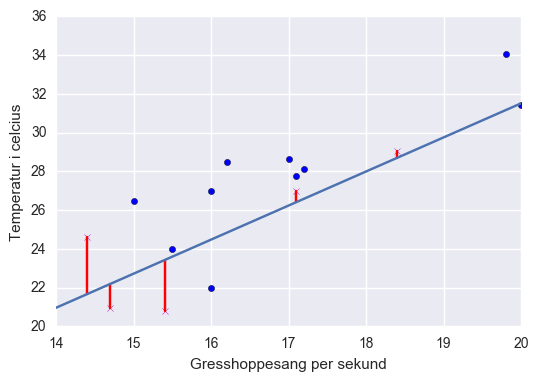

In [76]:
plt.figure()
plt.scatter(train_data,train_target)
plt.scatter(test_data,test_target,c='m',marker='x')

plt.xlabel('Gresshoppesang per sekund') # lable x aksen
plt.ylabel('Temperatur i celcius') # lable y aksen

# for å skrive ut både trening og testfeil bruker vi mean_square_error fra sklearn:
# importer mean_square_error
from sklearn.metrics import mean_squared_error

# skrive ut trening og testfeil for å sammenligne de to
print ("Treningsfeil: %f" % (mean_squared_error(reg2.predict(train_data),train_target)))
print ("Testfeil: %f" % (mean_squared_error(reg2.predict(test_data),test_target)))

# tegne opp feillinjer
plot_error_lines(test_data['chirps'],test_target['temperature'],reg2.predict)


# bruke reg2.predict til å tegne opp linja
x = np.linspace(0,40,501) 
y = reg2.predict(x[:,np.newaxis]) 
plt.plot(x,y)

plt.axis([14,20,20,36])
plt.show()

Vi kan se at testfeilen er like god som treningsfeilen (I dette tilfelle faktisk bedre, men det er nok litt flaks). Det kan tyde på at vi har funnet en god modell for sammenhengen mellom gresshoppesang og temperatur.
La oss prøve det samme for høyeregradspolynomet:

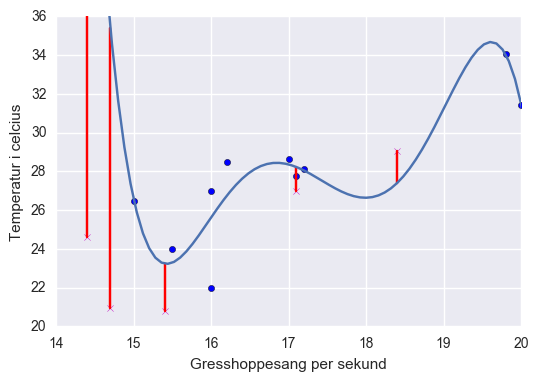

Treningsfeil: 1.893773
Testfeil: 208.149827


In [81]:
# lage flerdimensjonelle egenskaper
poly = PolynomialFeatures(degree=5)
c_p =  poly.fit_transform(train_data)

# lage og trene lineær regresjon
reg_p2 = LinearRegression()
reg_p2.fit(c_p,train_target)

def polyreg(x):
    return reg_p2.predict(poly.fit_transform(x))

# Ny figur
plt.figure()

# tegne opp røde feillinjer 
plot_error_lines(test_data['chirps'],test_target['temperature'],polyreg)

# tegne opp treningsdata
plt.scatter(train_data,train_target)

# tegne opp testata som rosa kryss
plt.scatter(test_data,test_target,c='m',marker='x')
plt.xlabel('Gresshoppesang per sekund') # lable x aksen
plt.ylabel('Temperatur i celcius') # lable y aksen

# tegne polynomet
x = np.linspace(0,40,501) 
y = polyreg(x[:,np.newaxis]) 
plt.plot(x,y)

plt.axis([14,20,20,36])
plt.show()

print ("Treningsfeil: %f" % (mean_squared_error(polyreg(train_data),train_target)))
print ("Testfeil: %f" % (mean_squared_error(polyreg(test_data),test_target)))


Her ser vi at selv om høyere gradspolynomet passer veldig bra til treningsdataen, og får liten treningsfeil, passer det dårlig med testdataen og får svært høy testfeil. Denne modellen er altså antagelig ikke noe særig god til å beskrive ukjent data. Den er *overtilpasset* til treningsdata.

## Kode din egen modell

Da er det på tide at du prøver litt selv. Det ligger et lite datasett med målinger over helning på strand i forhold til diameter på sandkorn under `'../datasets/small_examples/sand.csv'`. Disse dataene måler sammenhengen mellom hvor stort et sandkorn er i forhold til hvor bratt stranda den ligger på er. Prøv å lese inn dataene i cellen under

**(Sjekk eksemplene over hvis du står fast. Eller rekk opp hånda og spør!)**

In [84]:
# Skriv kode for å lese inn data her:
data = read_csv('../../datasets/small_examples/sand.csv')

I cellen under, prøv å vise frem av tabellen med `.head()`

In [85]:
# Skriv kode for å vise fram data her:
data.head()

,sandkorndiameter,strandhelning
0,0.170,0.63
1,0.190,0.70
2,0.220,0.82
3,0.235,0.88
4,0.235,1.15


Så kan vi splitte inn i trenings og testdata

In [96]:
# Skriv kode for å splitte inn i trenings og testdata her:
train_data, test_data, train_target, test_target = train_test_split(data[['strandhelning']],data[['sandkorndiameter']], test_size=0.33)

Nå kan vi lage og trene regessoren:

In [97]:
# skriv inn kode for å lage og trene en regressor her:
reg2 = LinearRegression()
reg2.fit(train_data,train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Nå kan du plotte treningsdataen som blå sirkler og testdataen som rosa kryss.
Bruk regressoren til å plotte linja og regn ut både trenings og testfeil

Treningsfeil: 0.004877
Testfeil: 0.000954


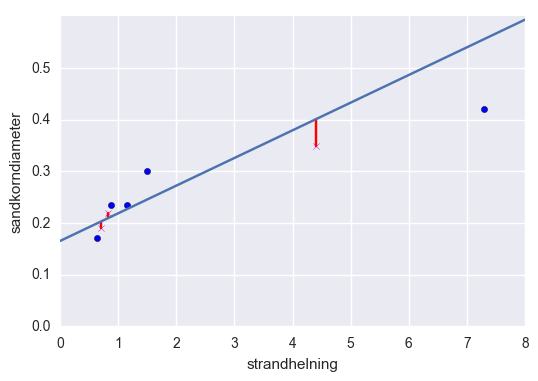

In [98]:
plt.figure()
plt.scatter(train_data,train_target)
plt.scatter(test_data,test_target,c='m',marker='x')


plt.xlabel('strandhelning')
plt.ylabel('sandkorndiameter')


print ("Treningsfeil: %f" % (mean_squared_error(reg2.predict(train_data),train_target)))
print ("Testfeil: %f" % (mean_squared_error(reg2.predict(test_data),test_target)))

plot_error_lines(test_data['strandhelning'],test_target['sandkorndiameter'],reg2.predict)


# bruke reg2.predict til å tegne opp linja
x = np.linspace(0,40,501) 
y = reg2.predict(x[:,np.newaxis]) 
plt.plot(x,y)


plt.axis([0,8,0,0.6])
plt.show()

Hva er diameteren for en strandhelning på 3 grader?
**Skriv inn svaret ditt i cellen under**